## Exploratory Data Analysis - Grammy Awards 🏆

### Introduction 🎶 
Exploratory Data Analysis (EDA) is a vital step in any data science project, allowing us to understand the structure, relationships, and patterns within the data before moving on to more advanced modeling or analysis.

In this project, we will be working with a dataset that contains information on Grammy Award nominations and winners, enabling us to explore trends and insights in the music industry.

## 🎯 EDA Goals

📊 **Analyze Data Distribution**: Examine individual variables to detect outliers, missing data, and understand the overall characteristics of the dataset.

🔗 **Investigate Variable Relationships**: Explore how different variables interact and look for correlations that could influence future modeling efforts.

🔍 **Discover Patterns and Trends**: Identify key trends or patterns that may offer valuable insights into the Grammy Awards data.

🛠️ **Prepare the Data**: Carry out necessary data cleaning and transformation steps to ensure the dataset is ready for analysis and model building.

### Grammy Awards Data:

This dataset offers a fascinating glimpse into the history of the Grammy Awards.  Each row represents a single nomination, capturing key aspects of the event:

| Feature             | Description                                                                     | Data Type |
|---------------------|---------------------------------------------------------------------------------|------------|
| `id`                | Unique identifier for each nomination record.  Think of it as a record number.      | Integer    |
| `year`              | The year the Grammy Awards ceremony took place.                                | Integer    |
| `title`             | The official title of the Grammy Awards ceremony for that year.                     | String     |
| `published_at`      | Timestamp indicating when the data was published to the database (UTC).         | DateTime   |
| `updated_at`        | Timestamp of the last database update for that record (UTC).                    | DateTime   |
| `category`          | The specific award category (e.g., "Record of the Year," "Album of the Year").  | String     |
| `nominee`           | The name of the song, album, or artist nominated for the award.                 | String     |
| `artist`            | The primary artist or artists associated with the nomination.                   | String     |
| `workers`           | A list of all the individuals and teams who contributed to the nominated work.   | String     |
| `img`               | A URL pointing to an image related to the nominee (may be missing).              | String     |
| `winner`            | A boolean value indicating whether the nominee won the award (True/False).      | Boolean    |




In [1]:
import sys
import os
from dotenv import load_dotenv

load_dotenv()
work_dir = os.getenv('WORK_DIR')
sys.path.append(work_dir)

from src.model.models import GrammyAwards
from src.database_connection.dbconnection import getconnection
from sqlalchemy.orm import sessionmaker, aliased
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import requests
import time
import json


### 🗂️ Data Import and Overview
In this section, we'll retrieve the Grammy Awards dataset from the source and conduct an initial examination to gain insight into its structure and key details.

In [2]:
engine = getconnection()
Session = sessionmaker(bind=engine)
session = Session()

Conected successfully to database airflowdb!


We'll retrieve the Grammy Awards dataset from our PostgreSQL database using a combination of SQLAlchemy and pandas. The process includes defining an alias for the `GrammyAwards` table, running a SQL query to extract the data, and then loading the results into a pandas DataFrame for further analysis.

In [3]:
table_alias = GrammyAwards.__table__

query = session.query(table_alias).statement
df = pd.read_sql_query(sql=query, con=engine)

df.head()


,id,year,title,published_at,updated_at,category,nominee,artist,workers,img,winner
0,1,2019,62nd Annual GRAMMY Awards (2019),2020-05-19 05:10:28,2020-05-19 05:10:28,Record Of The Year,Bad Guy,Billie Eilish,"Finneas O'Connell, producer; Rob Kinelski & Fi...",https://www.grammy.com/sites/com/files/styles/...,True
1,2,2019,62nd Annual GRAMMY Awards (2019),2020-05-19 05:10:28,2020-05-19 05:10:28,Record Of The Year,"Hey, Ma",Bon Iver,"BJ Burton, Brad Cook, Chris Messina & Justin V...",https://www.grammy.com/sites/com/files/styles/...,True
2,3,2019,62nd Annual GRAMMY Awards (2019),2020-05-19 05:10:28,2020-05-19 05:10:28,Record Of The Year,7 rings,Ariana Grande,"Charles Anderson, Tommy Brown, Michael Foster ...",https://www.grammy.com/sites/com/files/styles/...,True
3,4,2019,62nd Annual GRAMMY Awards (2019),2020-05-19 05:10:28,2020-05-19 05:10:28,Record Of The Year,Hard Place,H.E.R.,"Rodney “Darkchild” Jerkins, producer; Joseph H...",https://www.grammy.com/sites/com/files/styles/...,True
4,5,2019,62nd Annual GRAMMY Awards (2019),2020-05-19 05:10:28,2020-05-19 05:10:28,Record Of The Year,Talk,Khalid,"Disclosure & Denis Kosiak, producers; Ingmar C...",https://www.grammy.com/sites/com/files/styles/...,True


The Grammy dataset has 4810 rows and 11 columns.

In [4]:
df.shape

(4810, 11)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4810 entries, 0 to 4809
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   id            4810 non-null   int64         
 1   year          4810 non-null   int64         
 2   title         4810 non-null   object        
 3   published_at  4810 non-null   datetime64[ns]
 4   updated_at    4810 non-null   datetime64[ns]
 5   category      4810 non-null   object        
 6   nominee       4804 non-null   object        
 7   artist        2970 non-null   object        
 8   workers       2620 non-null   object        
 9   img           3443 non-null   object        
 10  winner        4810 non-null   bool          
dtypes: bool(1), datetime64[ns](2), int64(2), object(6)
memory usage: 380.6+ KB


Percentage of nulls by column

In [6]:
df.isnull().sum() * 100 / len(df) 

id               0.000000
year             0.000000
title            0.000000
published_at     0.000000
updated_at       0.000000
category         0.000000
nominee          0.124740
artist          38.253638
workers         45.530146
img             28.419958
winner           0.000000
dtype: float64

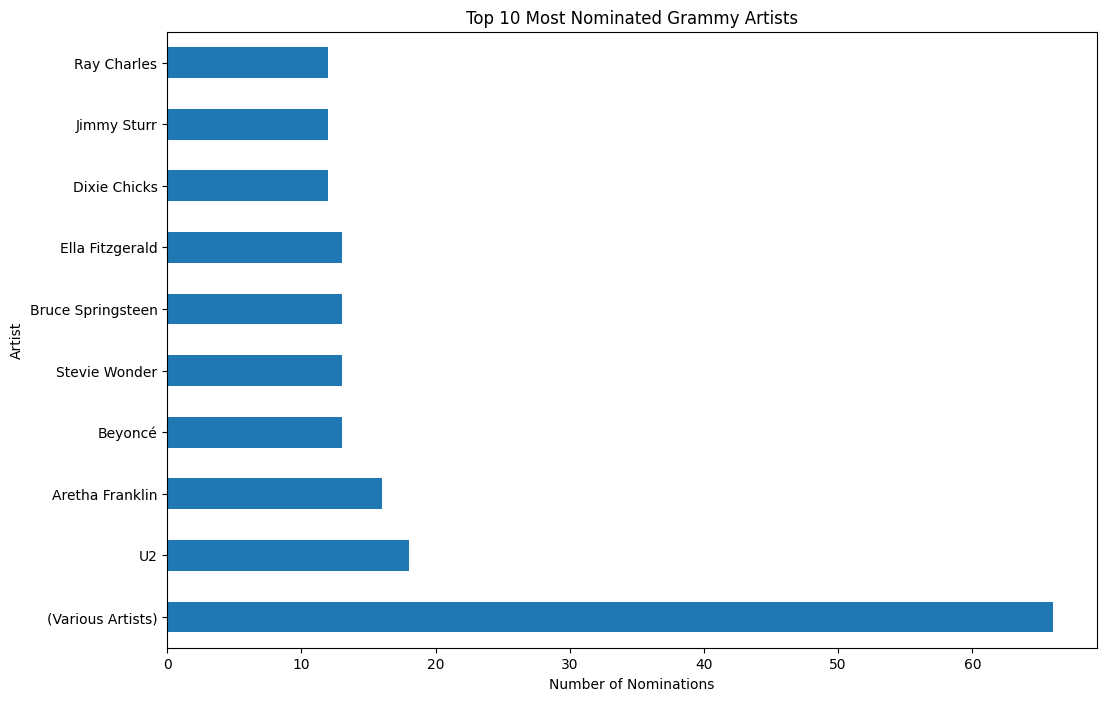

In [7]:
plt.figure(figsize=(12, 8))
df['artist'].value_counts().head(10).plot(kind='barh') 
plt.title('Top 10 Most Nominated Grammy Artists')
plt.xlabel('Number of Nominations')
plt.ylabel('Artist')
plt.show()

In [8]:
df.describe()

,id,year,published_at,updated_at
count,4810.000000,4810.000000,4810,4810
mean,2405.500000,1995.566944,2018-02-27 03:04:58.895425792,2019-09-24 07:09:05.449895936
min,1.000000,1958.000000,2017-11-28 00:03:45,2017-11-28 00:03:45
25%,1203.250000,1983.000000,2017-11-28 00:03:45,2019-09-10 01:06:59
50%,2405.500000,1998.000000,2017-11-28 00:03:45,2019-09-10 01:08:19
75%,3607.750000,2010.000000,2017-11-28 00:03:45,2019-09-10 01:11:09
max,4810.000000,2019.000000,2020-05-19 05:10:28,2020-09-01 12:16:40
std,1388.671727,17.149720,NaN,NaN


* **Range (1958-2019):** The data covers a substantial period of Grammy Awards history, spanning over six decades. This long time range allows for analyzing long-term trends and changes in the awards.

* **Average (around 1995):** The average year is close to the middle of the range, suggesting a relatively even distribution of awards across the years, at least in terms of the count of awards per year. However,  this doesn't necessarily mean that the number of awards *given* each year was constant; some years might have had significantly more awards than others.

* **Median (between 1983 and 2010):** Half of the Grammy award ceremonies occurred between 1983 and 2010. This suggests a possibly more even distribution around the median, especially since the average (mean) is similar to the median. This implies that there are no major skew in the data. This is a good indicator of a somewhat uniform distribution of awards over time.

* **Standard Deviation (17):** A standard deviation of 17 years indicates a moderate spread around the mean. This means that the years of the award ceremonies are relatively evenly distributed, not too concentrated around the mean or the median. A small standard deviation would imply data concentrated around the mean. A large standard deviation would indicate that the years of the ceremonies are highly dispersed.

* **Irrelevance of `published_at` and `updated_at`:** These columns likely contain timestamps related to the database updates, not related to the actual award ceremonies themselves. They are not relevant to the core analysis of Grammy award trends over time.




In [9]:
duplicate_rows = df[df.duplicated()]
print("number of duplicate rows: ", duplicate_rows.shape[0])

number of duplicate rows:  0


In [10]:
null_values = df.isna().sum()
null_values

id                 0
year               0
title              0
published_at       0
updated_at         0
category           0
nominee            6
artist          1840
workers         2190
img             1367
winner             0
dtype: int64

The "nominee" column contains six missing entries, while the "artist" column exhibits a substantial 1,840 missing values, which may pose challenges for the analysis. Furthermore, the "workers" column is significantly affected, with 2,190 null entries.

In [11]:
print(df[df['artist'].isnull()]['category'].value_counts())
print("\n") 
print(df[df['workers'].isnull()]['category'].value_counts())

category
Song Of The Year                                                        70
Best Opera Recording                                                    64
Best Album Notes                                                        63
Best Country Song                                                       55
Best Instrumental Composition                                           55
                                                                        ..
Best Classical Performance, Instrumental Soloist(s) (With Orchestra)     1
Best Historical Repackage Album                                          1
Best Arrangement Accompanying Vocal(s)                                   1
Best Historical Reissue                                                  1
Best Classical Performance - Operatic Or Choral                          1
Name: count, Length: 251, dtype: int64


category
Best New Artist                                                  51
Best Country Instrumental Performance           

**Missing `artist` Data:**

*  The output shows that missing `artist` values are heavily concentrated in categories like "Song Of The Year," "Best Opera Recording," "Best Album Notes," "Best Country Song," and "Best Instrumental Composition." 
* These categories are either:
    * **Awarded to songwriters or composers:**  Song of the Year, Best Country Song, and Best Instrumental Composition are awarded primarily to the writers of the music, not necessarily the performers.
    * **Not directly related to a performing artist:** Best Opera Recording and Best Album Notes recognize achievements in production and documentation, not specific performers.

**Missing `workers` Data:**

* The most frequent categories with missing `workers` are "Best New Artist," "Best Country Instrumental Performance," "Best Pop Instrumental Performance," and "Best Metal Performance." 
* **Inference:** The missing data in `workers` could be because:
    * **Best New Artist:** This award is focused solely on the artist, not the individual contributors on their music.
    * **Instrumental Categories:** Some instrumental awards might not always explicitly list all the contributors, especially in older records.


In [12]:
df[df['nominee'].isna()]

,id,year,title,published_at,updated_at,category,nominee,artist,workers,img,winner
2277,2262,2000,43rd Annual GRAMMY Awards (2000),2017-11-28 00:03:45,2019-09-10 01:11:09,"Remixer of the Year, Non-Classical",None,None,None,None,True
2376,2360,1999,42nd Annual GRAMMY Awards (1999),2017-11-28 00:03:45,2019-09-10 01:09:02,"Remixer Of The Year, Non-Classical",None,None,None,None,True
2469,2455,1998,41st Annual GRAMMY Awards (1998),2017-11-28 00:03:45,2019-09-10 01:08:19,"Remixer Of The Year, Non-classical",None,None,None,None,True
2562,2548,1997,40th Annual GRAMMY Awards (1997),2017-11-28 00:03:45,2019-09-10 01:07:37,"Remixer Of The Year, Non-Classical",None,None,None,None,True
3686,4574,1964,7th Annual GRAMMY Awards (1964),2017-11-28 00:03:45,2019-09-10 01:06:11,Best New Country & Western Artist Of 1964,None,None,None,None,True
4530,4526,1965,8th Annual GRAMMY Awards (1965),2017-11-28 00:03:45,2019-09-10 01:06:59,Best New Country & Western Artist,None,None,None,None,True


Because there are only 6 missings and them do not contain usefull information. Lets get rid of them

In [13]:
df = df.dropna(subset=['nominee'])

We're not going to use these columns either so we delete them

In [14]:
df = df.drop(columns=['published_at', 'updated_at', 'img'])

Which are the nominees whose artists are null but their workers are not?

In [15]:
nominees_no_artist_but_workers = df[(df['artist'].isnull()) & (df['workers'].notnull())][['nominee', 'category', 'workers']]
print(nominees_no_artist_but_workers)

                                                nominee  \
16                                              Bad Guy   
17                          Always Remember Us This Way   
19                                 Bring My Flowers Now   
20                                           Hard Place   
21                                                Lover   
...                                                 ...   
4804                                  Gaiete Parisienne   
4805  Tchaikovsky: Piano Concerto No. 1 In B Flat Mi...   
4806                             Segovia Golden Jubilee   
4807                             Beethoven: Quartet 130   
4809                                           Virtuoso   

                                               category  \
16                                     Song Of The Year   
17                                     Song Of The Year   
19                                     Song Of The Year   
20                                     Song Of The Year

In [22]:
df[df['artist'].isna() & df['workers'].notna()].head()

,id,year,title,category,nominee,artist,workers,winner
164,163,2019,62nd Annual GRAMMY Awards (2019),Best Improvised Jazz Solo,Sozinho,NaN,"Randy Brecker, soloist",True
165,164,2019,62nd Annual GRAMMY Awards (2019),Best Improvised Jazz Solo,Elsewhere,NaN,"Melissa Aldana, soloist",True
166,165,2019,62nd Annual GRAMMY Awards (2019),Best Improvised Jazz Solo,Tomorrow Is The Question,NaN,"Julian Lage, soloist",True
167,166,2019,62nd Annual GRAMMY Awards (2019),Best Improvised Jazz Solo,The Windup,NaN,"Branford Marsalis, soloist",True
168,167,2019,62nd Annual GRAMMY Awards (2019),Best Improvised Jazz Solo,Sightseeing,NaN,"Christian McBride, soloist",True


In [20]:
extracted_artists = df['workers'].str.extract(r'\(([^)]+)\)', expand=False)
df['artist'] = df['artist'].fillna(extracted_artists)
df['artist'] = df['artist'].str.replace(r'\(|\)', '', regex=True)

The code works to extract the name of the artists from the workers column

In [23]:
df[df['artist'].notna() & df['workers'].notna()].head()

,id,year,title,category,nominee,artist,workers,winner
0,1,2019,62nd Annual GRAMMY Awards (2019),Record Of The Year,Bad Guy,Billie Eilish,"Finneas O'Connell, producer; Rob Kinelski & Fi...",True
1,2,2019,62nd Annual GRAMMY Awards (2019),Record Of The Year,"Hey, Ma",Bon Iver,"BJ Burton, Brad Cook, Chris Messina & Justin V...",True
2,3,2019,62nd Annual GRAMMY Awards (2019),Record Of The Year,7 rings,Ariana Grande,"Charles Anderson, Tommy Brown, Michael Foster ...",True
3,4,2019,62nd Annual GRAMMY Awards (2019),Record Of The Year,Hard Place,H.E.R.,"Rodney “Darkchild” Jerkins, producer; Joseph H...",True
4,5,2019,62nd Annual GRAMMY Awards (2019),Record Of The Year,Talk,Khalid,"Disclosure & Denis Kosiak, producers; Ingmar C...",True


In [ ]:
df = df.drop(columns=['extracted_artist'])

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4804 entries, 0 to 4809
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        4804 non-null   int64 
 1   year      4804 non-null   int64 
 2   title     4804 non-null   object
 3   category  4804 non-null   object
 4   nominee   4804 non-null   object
 5   artist    4336 non-null   object
 6   workers   2620 non-null   object
 7   winner    4804 non-null   bool  
dtypes: bool(1), int64(2), object(5)
memory usage: 304.9+ KB


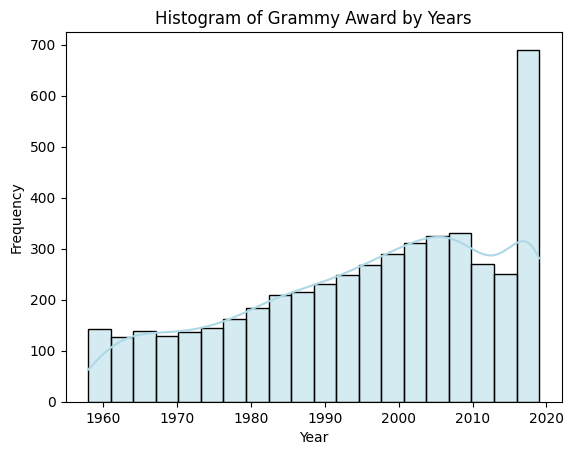

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.histplot(df['year'], kde=True, bins=20, color='lightblue')

plt.xlabel('Year')
plt.ylabel('Frequency')
plt.title('Histogram of Grammy Award by Years')
plt.show()


**Key Insights:**

- The histogram reveals an overall trend of increasing Grammy Awards over time, with a significant peak in 2019.
- A possible change in award structure or focus might have occurred after 2010.
- The early years of the Grammy Awards might have been more limited in terms of the number of categories or nominees.

This histogram provides valuable insights into the evolution of the Grammy Awards and can be used to further investigate potential factors influencing the number of awards given out each year.:

- Specific events or changes in the music industry that might have contributed to the growth or decline of Grammy Awards.
- The number of award categories over time to understand how the scope of the awards has evolved.
- The number of nominees per category to see if there has been a significant increase in competition.

/tmp/ipykernel_4750/3038206382.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Value', y='Frequency', data=top_df, palette="viridis")


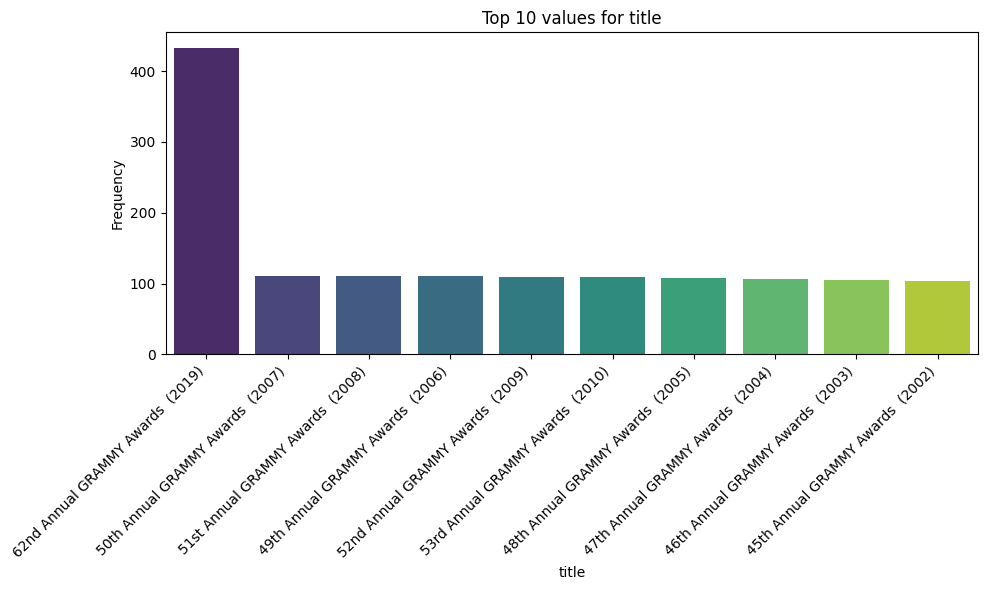

/tmp/ipykernel_4750/3038206382.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Value', y='Frequency', data=top_df, palette="viridis")


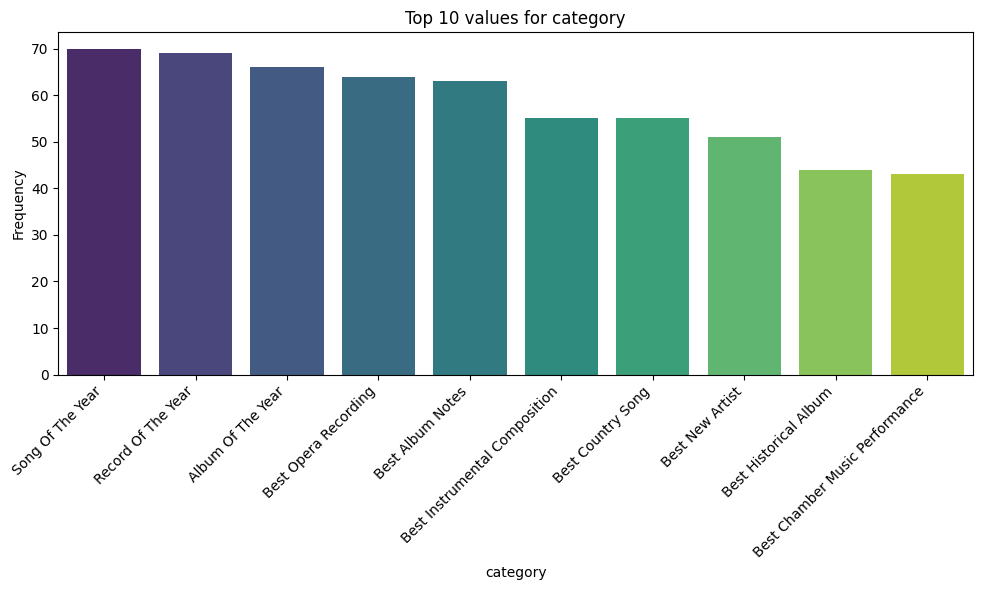

/tmp/ipykernel_4750/3038206382.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Value', y='Frequency', data=top_df, palette="viridis")


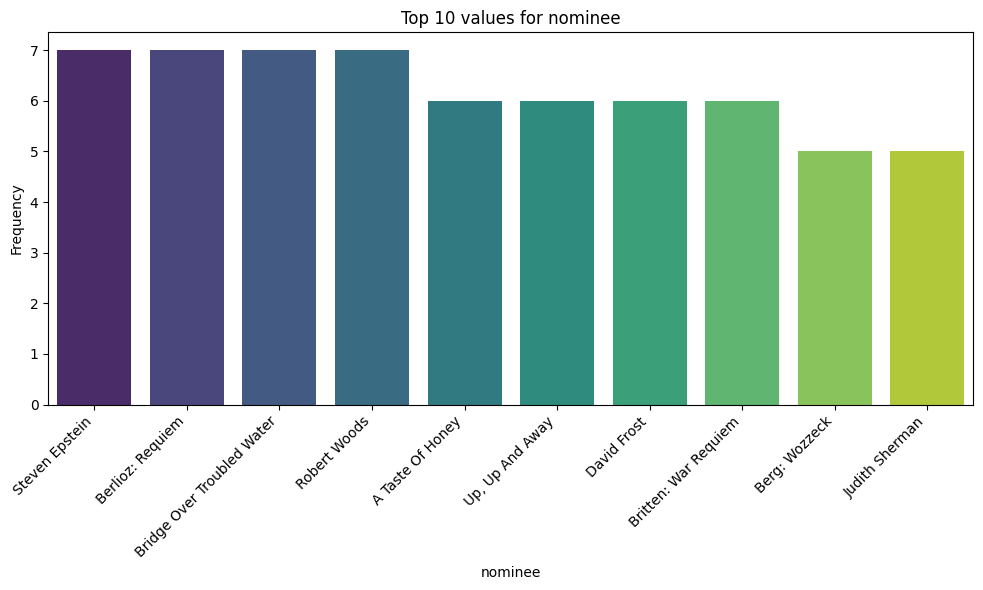

/tmp/ipykernel_4750/3038206382.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Value', y='Frequency', data=top_df, palette="viridis")


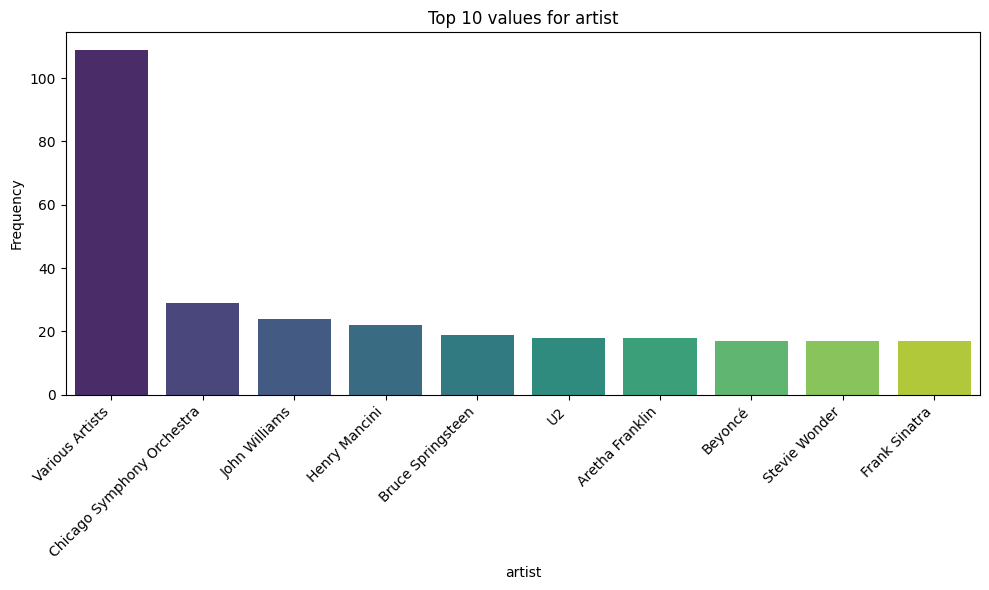

/tmp/ipykernel_4750/3038206382.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Value', y='Frequency', data=top_df, palette="viridis")


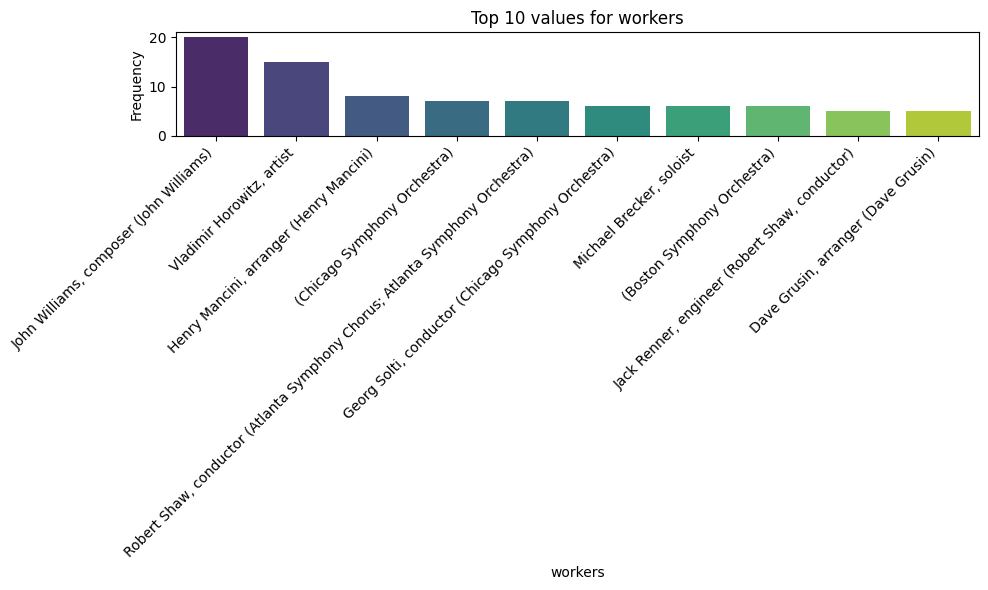

/tmp/ipykernel_4750/3038206382.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Value', y='Frequency', data=top_df, palette="viridis")


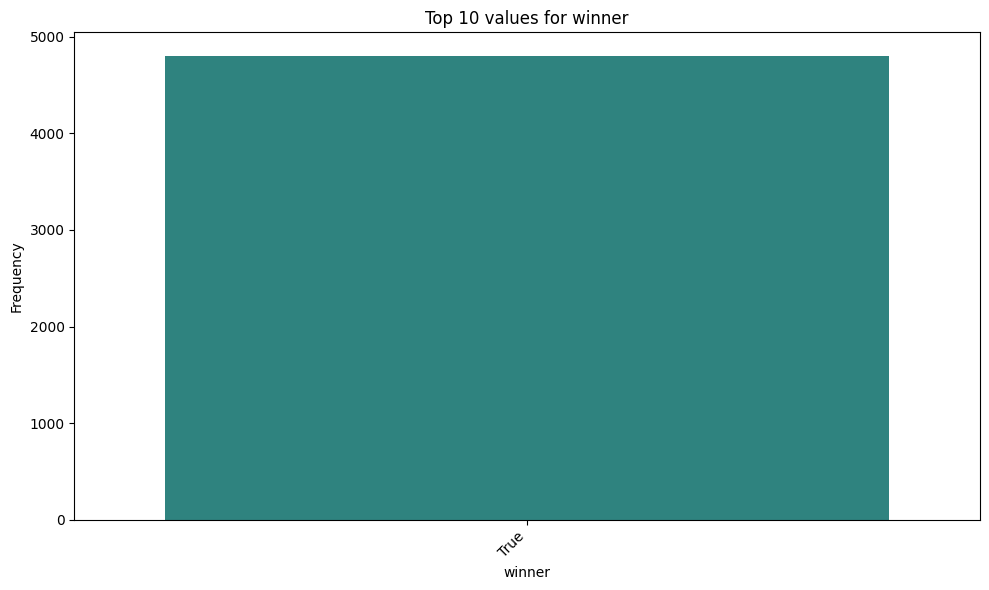

In [27]:
qualit = df.select_dtypes(include=['object', 'bool']).columns
qualit = qualit[qualit != 'img']

for col in qualit:
    top_counts = df[col].value_counts().head(10) 
    top_df = pd.DataFrame({'Value': top_counts.index, 'Frequency': top_counts.values})
    
    plt.figure(figsize=(10, 6))  
    sns.barplot(x='Value', y='Frequency', data=top_df, palette="viridis")
    
    plt.title(f'Top 10 values for {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.xticks(rotation=45, ha='right', fontsize=10) 
    
    plt.tight_layout()
    plt.show()



The data is sorted in a way that, within each year-category group, the actual winner is always listed *first*.
* **The code's logic:** The code leverages this assumption by finding the *first* entry (the one with `cumcount()` equal to 0) in each year-category group and marking that as the `True` winner.

In [28]:
df['winner'] = df.groupby(['year', 'category']).cumcount() == 0

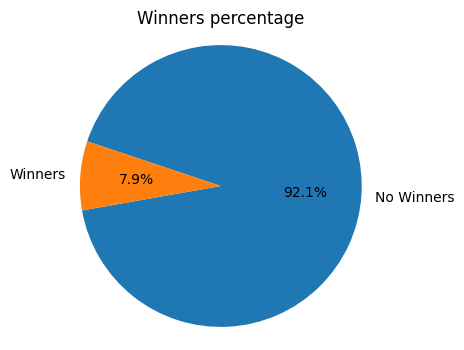

In [29]:
count_winners = df['winner'].value_counts()


plt.figure(figsize=(4, 4))
plt.pie(count_winners, labels=['No Winners', 'Winners'], autopct='%1.1f%%', startangle=190)
plt.title('Winners percentage')
plt.axis('equal')  
plt.show()


1. **Dominance of the 62nd Annual GRAMMY Awards (2019)**: The "62nd Annual GRAMMY Awards (2019)" appears significantly more often than any other entry, with a frequency exceeding 400. This suggests that this particular event is highly represented in your dataset, possibly indicating that more data has been collected or concentrated around the 2019 event.
   
2. **Other Frequent Years**: After the 2019 event, the next most frequent event is the "50th Annual GRAMMY Awards (2007)," though with much lower frequency compared to 2019, at around 100 occurrences. Following this, other annual editions, such as 51st (2008), 49th (2006), and 52nd (2009), are represented relatively equally, with similar frequencies around the 80-100 range.

3. **Gradual Decline**: The frequency of occurrences gradually decreases from the top-ranking "62nd Annual" to the 10th-ranked "45th Annual GRAMMY Awards (2002)," showing a more balanced representation across the rest of the years.

In [30]:
df.dtypes

id           int64
year         int64
title       object
category    object
nominee     object
artist      object
workers     object
winner        bool
dtype: object

In [31]:
df.loc[:, 'nominee'] = df['nominee'].str.title().str.strip()
df.loc[:, 'artist'] = df['artist'].str.title().str.strip()
df.loc[:, 'workers'] = df['workers'].str.title().str.strip()
df.loc[:, 'title'] = df['title'].str.title().str.strip()
df.loc[:, 'category'] = df['category'].str.title().str.strip()

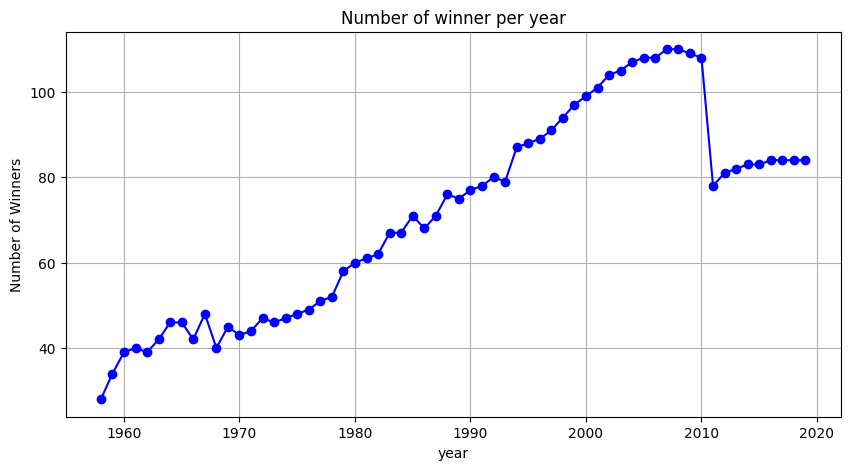

In [32]:
df['year'] = pd.to_numeric(df['year'], errors='coerce')

winners_per_year = df[df['winner']].groupby('year').size()

plt.figure(figsize=(10, 5))
plt.plot(winners_per_year.index, winners_per_year.values, marker='o', linestyle='-', color='b')
plt.title('Number of winner per year')
plt.xlabel('year')
plt.ylabel('Number of Winners')
plt.grid(True)
plt.show()

* **Overall Increase:** The chart displays a clear upward trend in the number of Grammy Award winners over time, with a significant increase from the 1960s to the 2010s.  This suggests that the number of award categories or the overall scope of the Grammy Awards has grown considerably over the years, potentially reflecting a wider range of music genres or greater emphasis on recognizing achievements across the music industry.

* **Stabilization After 2010:** After a steady increase through the 2000s, the number of winners appears to stabilize around 2010-2011. This could indicate a possible shift in the structure or focus of the Grammy Awards, perhaps a deliberate attempt to limit the number of awards given out, or possibly a change in the nomination process.

* **Peak in 2019:** The chart shows a very high peak in 2019, with around 110 winners.  This suggests a potential expansion of award categories or a particularly large number of nominations in that year.  This could be due to a significant increase in the number of categories or a broader selection of nominated artists or works.


In [33]:
top_artist = df[df['winner']].groupby('artist').size().reset_index(name='candidate_count')

top_artist = top_artist.sort_values(by='candidate_count', ascending=False).head(10)

print(top_artist)

                          artist  candidate_count
1936             Various Artists               97
362   Chicago Symphony Orchestra               29
929                John Williams               24
741                Henry Mancini               22
270            Bruce Springsteen               19
90               Aretha Franklin               18
1924                          U2               18
1719               Stevie Wonder               17
636                Frank Sinatra               17
592                 Eric Clapton               15


- Songs featuring multiple performers are categorized under "(Various Artists)."
- The Chicago Symphony Orchestra, John Williams, and Henry Mancini have the highest number of nominations.

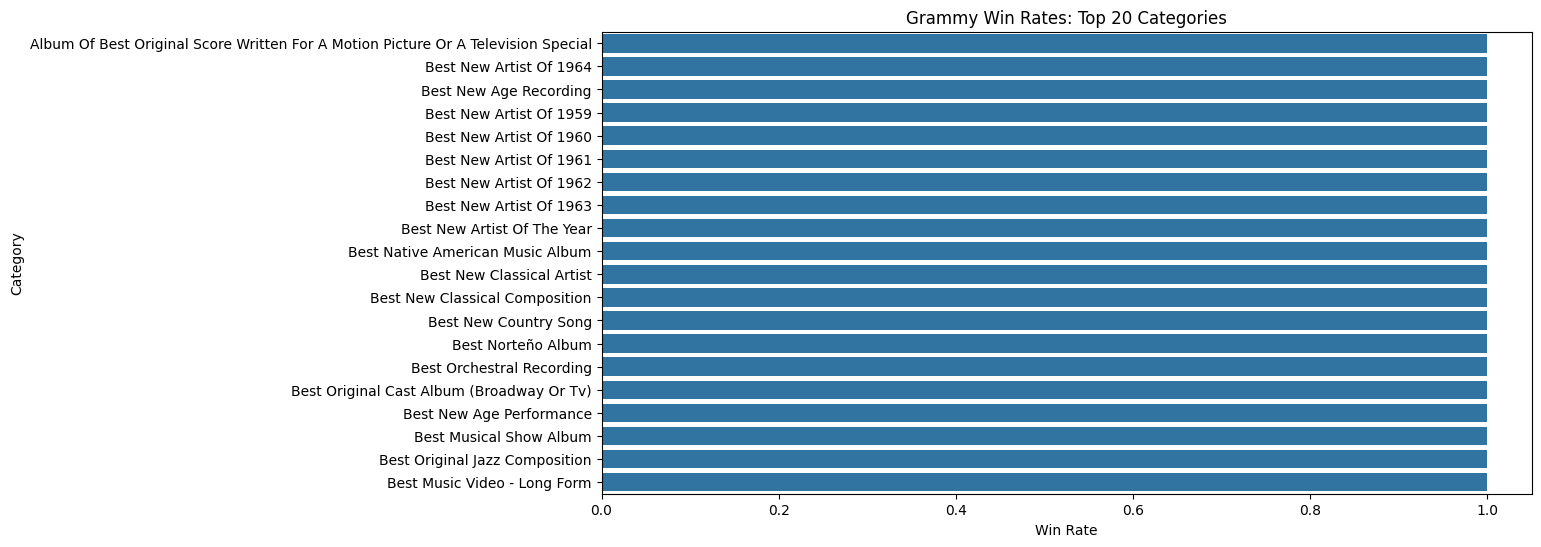

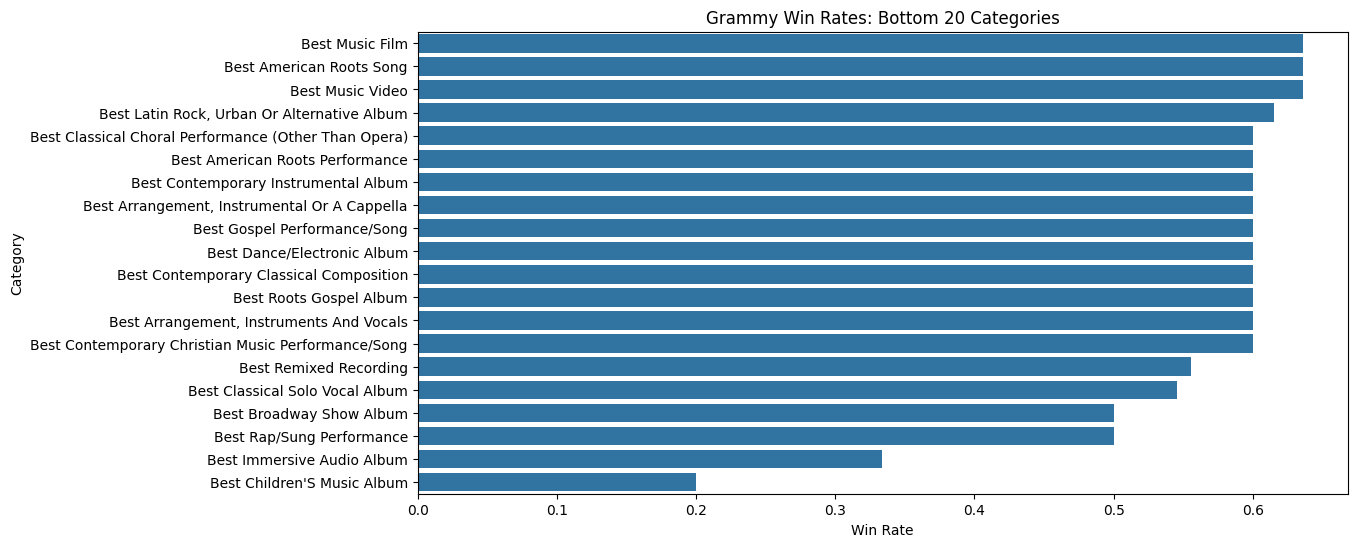

In [40]:
category_win_rates = df.groupby('category')['winner'].mean().sort_values(ascending=False)

top_20_categories = category_win_rates.head(20)
bottom_20_categories = category_win_rates.tail(20)

# Plot the top 20 categories
plt.figure(figsize=(12, 6))
sns.barplot(x=top_20_categories.values, y=top_20_categories.index)
plt.title('Grammy Win Rates: Top 20 Categories')
plt.xlabel('Win Rate')
plt.ylabel('Category')
plt.show()

# Plot the bottom 20 categories
plt.figure(figsize=(12, 6))
sns.barplot(x=bottom_20_categories.values, y=bottom_20_categories.index)
plt.title('Grammy Win Rates: Bottom 20 Categories')
plt.xlabel('Win Rate')
plt.ylabel('Category')
plt.show()

**Top 20 Categories (Highest Win Rates):**

* **Strong Dominance of "Best New Artist" Awards:**  It seems like "Best New Artist" awards, particularly for specific years, have a 100% win rate. This makes sense since there is only one winner per year in this category. 
* **Other High Win Rates:** Categories like "Album Of Best Original Score..." and "Best New Age Recording" also have very high win rates, likely due to fewer nominees in those categories.

**Bottom 20 Categories (Lowest Win Rates):**

* **Competitive Major Categories:**  Many of the general awards like "Best Music Video," "Best American Roots Song," "Best Music Film," and "Best Latin Rock, Urban, or Alternative Album" have lower win rates. This indicates strong competition in those categories.
* **Highly Competitive Performance Categories:** Awards focused on specific types of performance, such as  "Best Remixed Recording," "Best Dance/Electronic Album," and "Best Contemporary Classical Composition" are also very competitive. 

**Preliminary Insights:**

* **Year-Specific "Best New Artist" is Not Informative:**  The high win rates for year-specific "Best New Artist" categories are not insightful and could be removed from future analyses. They don't tell us anything about the competitiveness of the award.
* **Niche Categories vs. Mainstream Categories:**  Niche categories or awards with fewer nominees tend to have higher win rates, while major, more popular categories tend to be more competitive.

Lets see all the categories

In [38]:
with pd.option_context('display.max_rows', None): 
    print(df['category'].value_counts())

category
Song Of The Year                                                                                            70
Record Of The Year                                                                                          69
Album Of The Year                                                                                           66
Best Opera Recording                                                                                        64
Best Album Notes                                                                                            63
Best Instrumental Composition                                                                               55
Best Country Song                                                                                           55
Best New Artist                                                                                             51
Best Historical Album                                                                                  

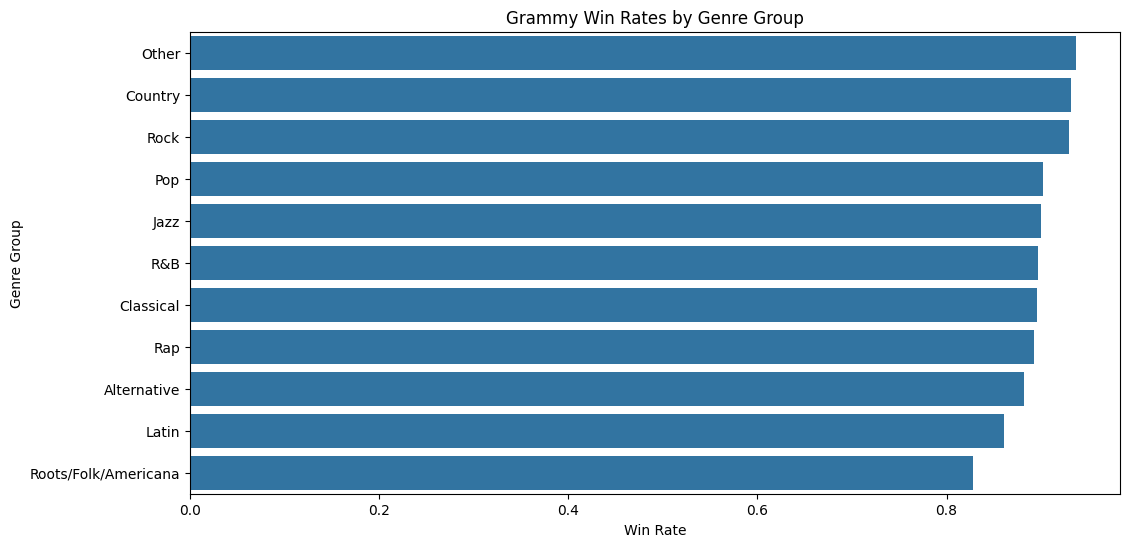

In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pop_categories = [
    "Best Pop Vocal Album", "Best Pop Solo Performance", "Best Pop Duo/Group Performance", 
    "Best Pop Instrumental Performance", "Best Pop Instrumental Album", 
    "Best Traditional Pop Vocal Album", "Best Traditional Pop Performance", 
    "Best Pop Vocal Performance, Female", "Best Pop Vocal Performance, Male", 
    "Best Pop Vocal Performance By A Duo Or Group", 
    "Best Pop Vocal Performance By A Duo, Group Or Chorus", 
    "Best Pop Instrumental Performance (Orchestra, Group Or Soloist)", 
    "Best Pop Instrumental Performance By An Instrumental Performer", 
    "Best Pop Instrumental Performance By An Arranger, Composer, Orchestra And/Or Choral Leader",
    "Record Of The Year", "Song Of The Year", "Album Of The Year"  
]

rock_categories = [
    "Best Rock Performance", "Best Rock Album", "Best Rock Song", 
    "Best Rock Instrumental Performance", "Best Rock Performance By A Duo Or Group With Vocal", 
    "Best Rock Performance By A Duo Or Group With Vocals", "Best Solo Rock Vocal Performance", 
    "Best Rock Vocal Performance, Female", "Best Rock Vocal Performance, Male", 
    "Best Rock Vocal Performance By A Duo Or Group", 
    "Best Rock Instrumental Performance (Orchestra, Group Or Soloist)",
    "Best Hard Rock Performance", "Best Hard Rock Performance With Vocal", 
    "Best Hard Rock/Metal Performance Vocal Or Instrumental",
    "Best Metal Performance", "Best Metal Performance With Vocal"
]

rnb_categories = [
    "Best R&B Performance", "Best R&B Album", "Best R&B Song", 
    "Best Traditional R&B Performance", "Best Traditional R&B Vocal Performance", 
    "Best R&B Vocal Performance, Female", "Best R&B Vocal Performance, Male", 
    "Best R&B Performance By A Duo Or Group With Vocal", 
    "Best R&B Performance By A Duo Or Group With Vocals", 
    "Best R&B Performance By A Duo Or Group With Vocal", 
    "Best R&B Instrumental Performance", 
    "Best R&B Performance By A Duo Or Group, Vocal Or Instrumental", 
    "Best Rhythm & Blues Recording", 
    "Best Rhythm & Blues Solo Vocal Performance, Male Or Female", 
    "Best Rhythm & Blues Group Performance, Vocal Or Instrumental",
    "Best Urban Contemporary Album", "Best Contemporary R&B Album" 
]

country_categories = [
    "Best Country Solo Performance", "Best Country Duo/Group Performance", 
    "Best Country Album", "Best Country Song", "Best Country Instrumental Performance", 
    "Best Country Vocal Performance, Female", "Best Country Vocal Performance, Male", 
    "Best Country Performance By A Duo Or Group With Vocal", 
    "Best Country Performance By A Duo Or Group With Vocals", 
    "Best Country Instrumental Performance (Orchestra, Group Or Soloist)", 
    "Best Country & Western Recording", 
    "Best Country & Western Solo Vocal Performance, Female", 
    "Best Country & Western Solo Vocal Performance, Male", 
    "Best Country & Western Performance Duet, Trio Or Group (Vocal Or Instrumental)", 
    "Best Country & Western Song", "Best Country Vocal Collaboration", 
    "Best Country Collaboration With Vocals", "Best Bluegrass Album", 
    "Best Bluegrass Recording", "Best Bluegrass Recording (Vocal Or Instrumental)" 
]

rap_categories = [
    "Best Rap Performance", "Best Rap Album", "Best Rap Song", 
    "Best Rap Solo Performance", "Best Rap Performance By A Duo Or Group", 
    "Best Rap/Sung Collaboration" 
]

alternative_categories = [
    "Best Alternative Music Performance", "Best Alternative Music Album"
]

jazz_categories = [
    "Best Jazz Vocal Album", "Best Jazz Instrumental Album", 
    "Best Large Jazz Ensemble Album", "Best Improvised Jazz Solo", 
    "Best Jazz Instrumental Solo", "Best Jazz Instrumental Performance, Soloist", 
    "Best Jazz Instrumental Performance, Soloist (On A Jazz Recording)", 
    "Best Jazz Instrumental Performance, Group", 
    "Best Jazz Instrumental Performance, Individual Or Group", 
    "Best Jazz Performance - Small Group Or Soloist With Small Group", 
    "Best Jazz Performance - Large Group Or Soloist With Large Group", 
    "Best Jazz Performance By A Soloist", "Best Jazz Performance By A Group", 
    "Best Jazz Performance By A Big Band", "Best Contemporary Jazz Performance", 
    "Best Contemporary Jazz Album", 
    "Best Contemporary Jazz Performance (Instrumental)", 
    "Best Latin Jazz Album", "Best Latin Jazz Performance" 
]

classical_categories = [
    "Best Orchestral Performance", "Best Opera Recording", "Best Choral Performance", 
    "Best Chamber Music/Small Ensemble Performance", "Best Classical Instrumental Solo", 
    "Best Classical Solo Vocal Album", "Best Classical Compendium", 
    "Best Contemporary Classical Composition", "Best Classical Crossover Album", 
    "Best Orchestral Recording", "Best Classical Performance - Orchestra", 
    "Best Opera Recording", "Best Choral Performance (Other Than Opera)", 
    "Best Classical Performance - Instrumental Soloist Or Soloists (With Orchestra)", 
    "Best Classical Performance - Instrumental Soloist Or Soloists (Without Orchestra)", 
    "Best Chamber Music Performance", "Best Classical Vocal Soloist Performance", 
    "Best New Classical Artist", "Best New Classical Composition", 
    "Best Classical Performance, Instrumental Soloist (With Orchestra)", 
    "Best Classical Performance, Instrumental Soloist (Without Orchestra)", 
    "Best Classical Performance - Instrumental Soloist Or Soloists (With Or Without Orchestra)", 
    "Best Classical Performance - Concerto Or Instrumental Soloist (With Full Orchestral Accompaniment)", 
    "Best Classical Performance - Concerto Or Instrumental Soloist (Other Than Full Orchestral Accompaniment)", 
    "Best Classical Chamber Music Performance - Instrumental Or Vocal", 
    "Best Classical Performance - Vocal Soloist (With Or Without Orchestra)", 
    "Best Classical Performance - Operatic Or Choral"  
]

latin_categories = [
    "Best Latin Pop Album", "Best Latin Rock, Urban or Alternative Album", "Best Tropical Latin Album", 
    "Best Regional Mexican Music Album (Including Tejano)", "Best Latin Pop Performance", 
    "Best Tropical Latin Performance", "Best Mexican-American/Tejano Music Performance", 
    "Best Latin Rock/Alternative Performance", "Best Traditional Tropical Latin Album", 
    "Best Latin Rock, Alternative Or Urban Album", "Best Regional Mexican Album", 
    "Best Latin Pop, Rock, Or Urban Album", "Best Regional Mexican Or Tejano Album" 
]

roots_folk_americana_categories = [
    "Best American Roots Performance", "Best American Roots Song", "Best Americana Album", 
    "Best Bluegrass Album", "Best Folk Album", "Best Regional Roots Music Album", 
    "Best Traditional Folk Album", "Best Contemporary Folk Album", 
    "Best Traditional Folk Recording", "Best Contemporary Folk Recording", 
    "Best Bluegrass Recording", "Best Contemporary Folk/Americana Album",
    "Best Ethnic Or Traditional Folk Recording"
]

def assign_genre_group(category):
    if category in pop_categories:
        return "Pop"
    elif category in rock_categories:
        return "Rock"
    elif category in rnb_categories:
        return "R&B"
    elif category in country_categories:
        return "Country"
    elif category in rap_categories:
        return "Rap"
    elif category in alternative_categories:
        return "Alternative"
    elif category in jazz_categories:
        return "Jazz"
    elif category in classical_categories:
        return "Classical"
    elif category in latin_categories:
        return "Latin"
    elif category in roots_folk_americana_categories:
        return "Roots/Folk/Americana"
    else:
        return "Other"

df['genre_group'] = df['category'].apply(assign_genre_group)

genre_group_win_rates = df.groupby('genre_group')['winner'].mean().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x=genre_group_win_rates.values, y=genre_group_win_rates.index)
plt.title('Grammy Win Rates by Genre Group')
plt.xlabel('Win Rate')
plt.ylabel('Genre Group')
plt.show()

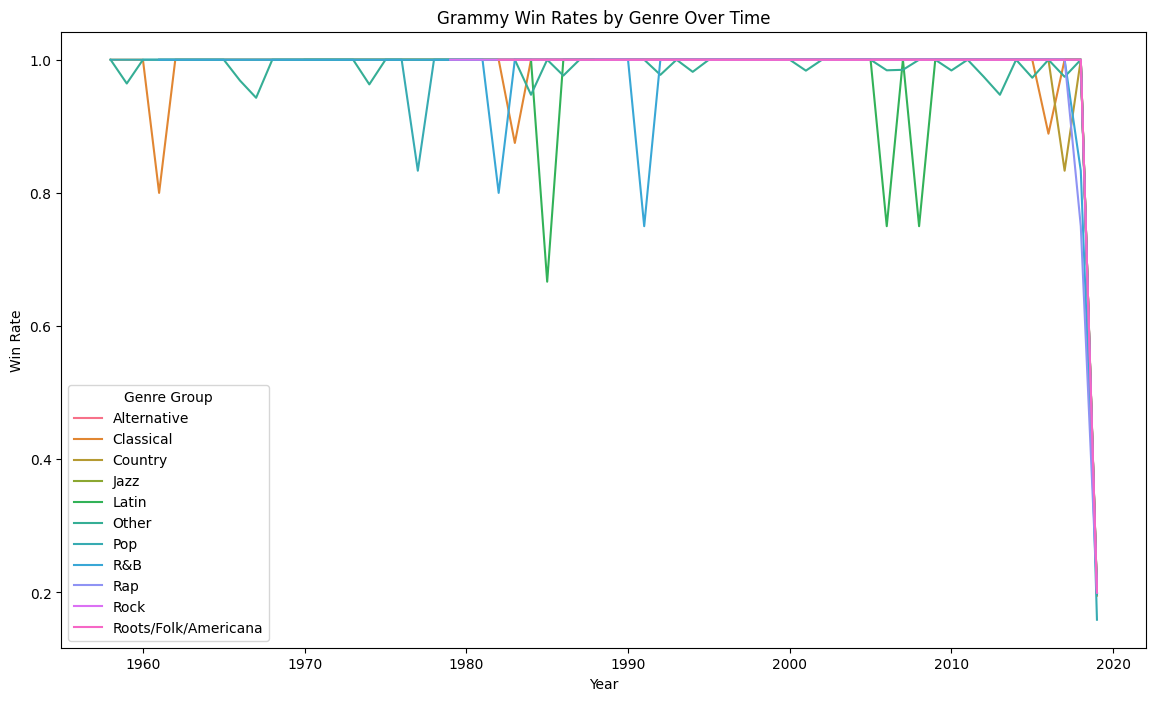

In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Calculate win rates by genre and year
genre_year_win_rates = df.groupby(['genre_group', 'year'])['winner'].mean().reset_index()

# Plot win rate trends over time for each genre
plt.figure(figsize=(14, 8))
sns.lineplot(x='year', y='winner', hue='genre_group', data=genre_year_win_rates)
plt.title('Grammy Win Rates by Genre Over Time')
plt.xlabel('Year')
plt.ylabel('Win Rate')
plt.legend(title='Genre Group')
plt.show()

**General Trends:**

* **Overall High Win Rates:** Most genres, especially Pop, Rock, Country, R&B, and Jazz, consistently maintain high win rates (above 80%) across the analyzed period. This suggests a generally stable and predictable award distribution within these core genres.
* **Fluctuations and Data Sparsity:** Some genres, like Classical, Latin, and "Other," show more pronounced fluctuations in their win rates, potentially indicating shifts in the number of awards given or the competitiveness within those categories over time.
* **Missing Data in Early Years:** The significant drop in win rates for almost all genres around the late 1950s and early 1960s likely reflects missing data or fewer awards presented in those years. It's important to consider the limitations of historical data.
* **Recent Trend:** The most striking observation is the sharp decline in win rates for all genres in the most recent years (around 2019-2020). This significant drop suggests a change in either the voting process, award categories, or data collection methodologies during this period.

**Specific Genre Trends:**

* **Alternative:** This genre shows a gradual increase in win rate from the 1990s onward, perhaps reflecting its growing popularity and recognition by the Recording Academy.
* **Rap:** Rap's win rate also seems to have a slight upward trend over the years, although it remains consistently lower than many other core genres.
* **Latin:** Latin music's win rate is more erratic, with peaks and valleys throughout the years, suggesting fluctuations in representation and recognition.


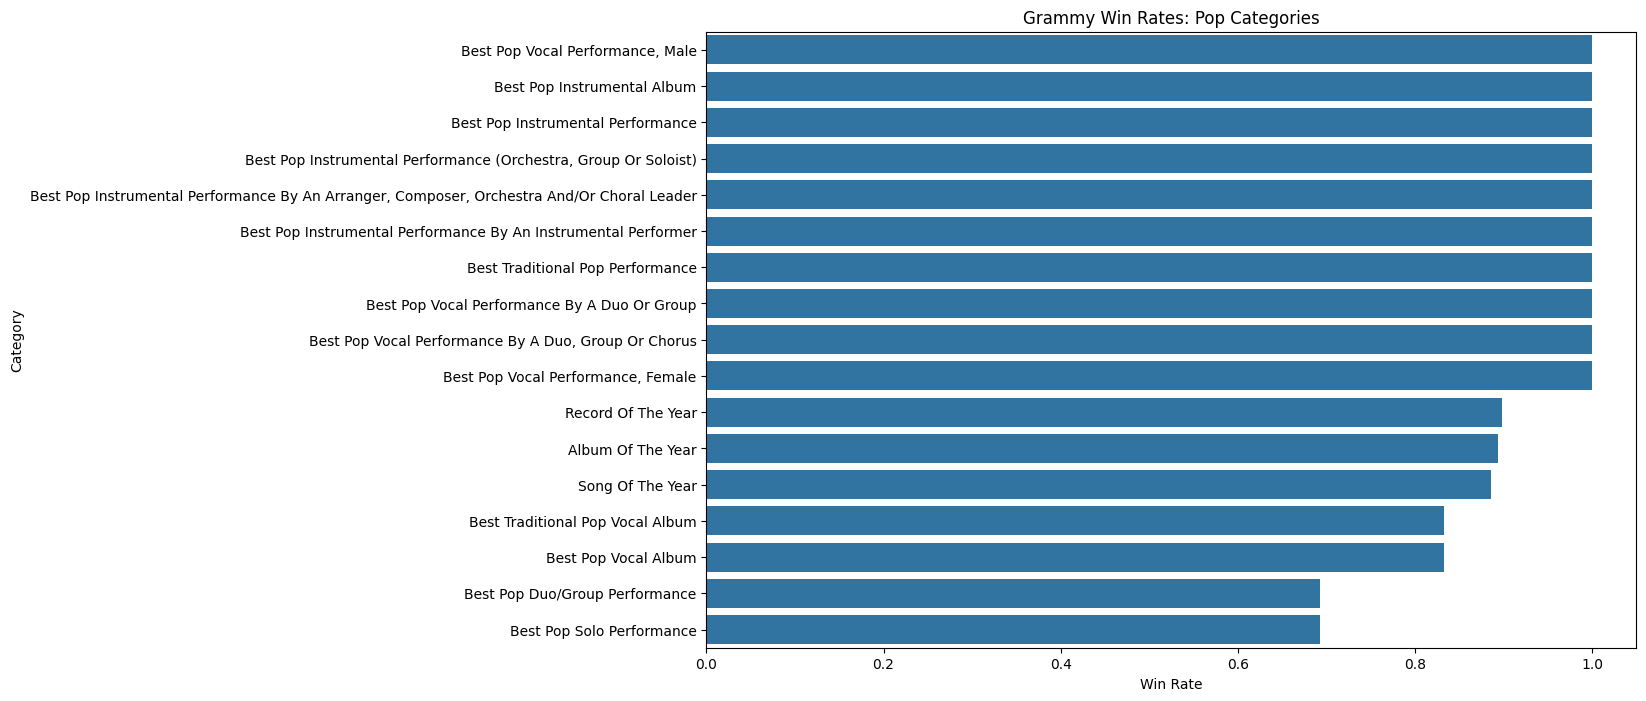

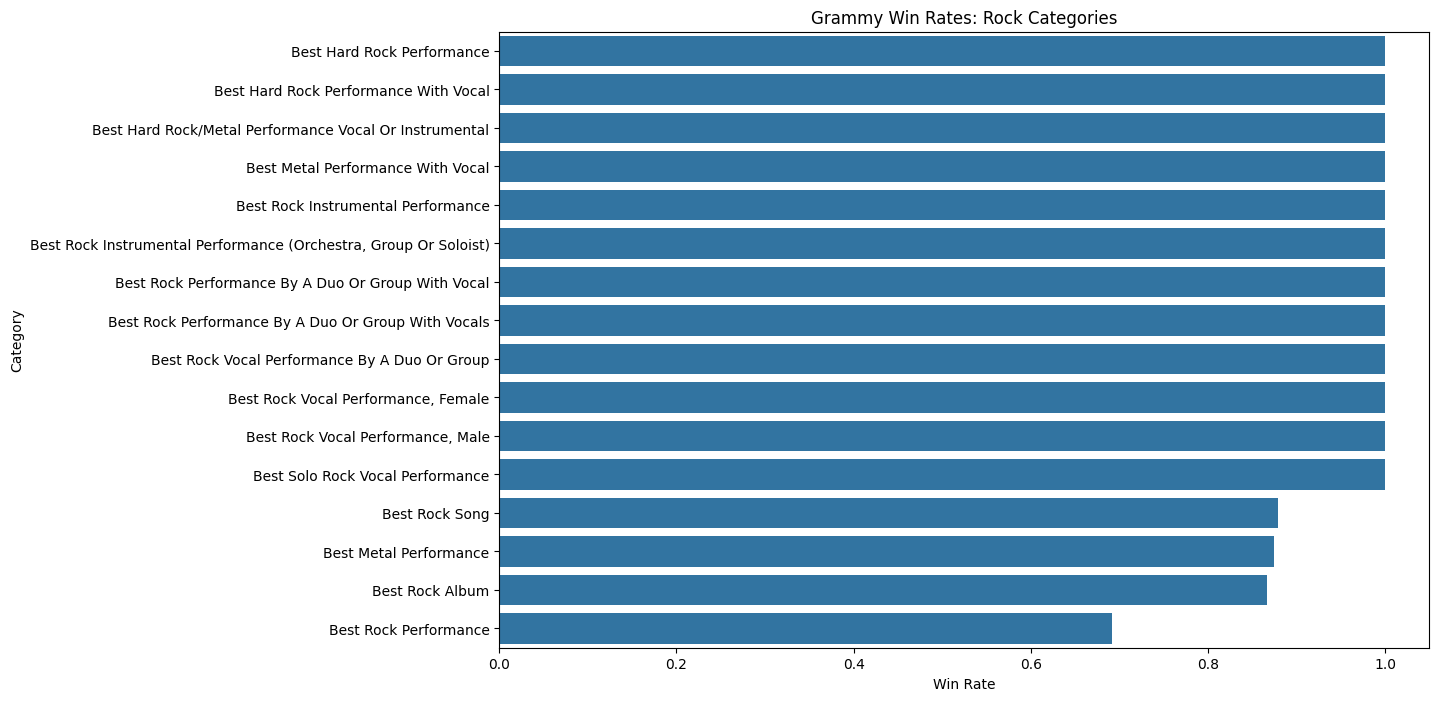

In [44]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



# Function to plot win rates for categories within a genre
def plot_genre_category_win_rates(genre_name):
    genre_df = df[df['genre_group'] == genre_name]
    category_win_rates = genre_df.groupby('category')['winner'].mean().sort_values(ascending=False)

    plt.figure(figsize=(12, 8))
    sns.barplot(x=category_win_rates.values, y=category_win_rates.index)
    plt.title(f'Grammy Win Rates: {genre_name} Categories')
    plt.xlabel('Win Rate')
    plt.ylabel('Category')
    plt.show()

plot_genre_category_win_rates('Pop') 

plot_genre_category_win_rates('Rock')

**Observations:**

* **"Other" Genre Group Dominates:** The "Other" genre group, which likely includes categories not easily classified into specific musical genres, has the highest win rate. It's important to investigate what specific categories fall into this group to see if there are any patterns or if it can be further subdivided.
* **High Win Rates Across Most Genres:** Country, Rock, Pop, Jazz, R&B, and Classical all have fairly similar win rates, hovering above 85%. This suggests a relatively consistent level of competitiveness across these core genres.
* **Lower Win Rates in Rap, Alternative, and Latin:**  Rap, Alternative, and Latin categories have slightly lower win rates, indicating a potentially more competitive landscape within these genres.

**Key Findings:**

* **Missing Data:** 
    * The `artist` column has a significant amount of missing data, but this is not random. It's concentrated in categories where the award is given to songwriters, composers, or for production achievements rather than performing artists. 
    * The `workers` column also has missing values, likely due to the "Best New Artist" category and older records in instrumental categories where contributors were not always explicitly listed. 
    * We decided to:
        * Keep missing `artist` values as they are. 
        * Handle `workers` based on the specific needs of your analysis (imputing "Unknown" or gathering additional data).

* **Most Nominated Artists:** 
    *  "(Various Artists)" dominated the nomination count due to its nature. This is valuable but could skew analyses focused on individual artists. 
    * U2, Aretha Franklin, Beyoncé, and Stevie Wonder are among the most frequently nominated individual artists or bands. 

* **Win Rates by Category:**
    * Year-specific "Best New Artist" categories had a 100% win rate, which wasn't informative. These can be removed from further analysis.
    * Niche categories or those with fewer nominees tend to have higher win rates compared to major, more mainstream categories. 
    * Major competitive categories include "Best Music Video", "Best Music Film", "Best Latin Rock, Urban, or Alternative Album", and many performance-specific categories.

* **Win Rates by Genre Group:** 
    * The "Other" category (likely those not falling into standard musical genres) had the highest win rate. This needs further investigation. 
    *  Pop, Rock, Jazz, R&B, and Classical had very similar win rates, indicating fairly consistent competitiveness. 
    * Rap, Alternative, and Latin genres had slightly lower win rates, suggesting a potentially more competitive landscape.

**Overall:**

The EDA has given us a clearer understanding of the Grammy Awards dataset, its limitations, and some initial trends. We identified patterns in missing data, the most nominated artists, and variations in competitiveness across categories and genres.

**Next Steps (Potential):**
    * Investigate the "Other" genre group.
    * Analyze genre-specific win rate trends over time.
    * Calculate and visualize win rates for individual categories within each genre. 
    * Explore additional relationships between variables like artist, workers, year, and winner.


 ### ⬅️ Continue with 003_EDA_spotify_.ipynb